# 2020년 10월 22일(목)

# <font color='red'> 실습_00
### <font color='red'> brier score를 구하고 예측모델 y_stupid의 혼동표와 분석보고서를 구하라

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

In [3]:
y_true = np.array([0, 1, 1, 0])

y_smart = np.array([0.1, 0.9, 0.8, 0.3])
y_normal = np.array([0.4, 0.3, 0.6, 0.2])
y_dummy = np.array([0.5, 0.5, 0.5, 0.5])
y_stupid = np.array([0.9, 0.1, 0.7, 0.7])

In [4]:
from sklearn.metrics import brier_score_loss

In [5]:
brier_score_loss(y_true, y_smart)
brier_score_loss(y_true, y_normal)
brier_score_loss(y_true, y_dummy)
brier_score_loss(y_true, y_stupid)

0.03749999999999999

0.2125

0.25

0.55

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

              preci

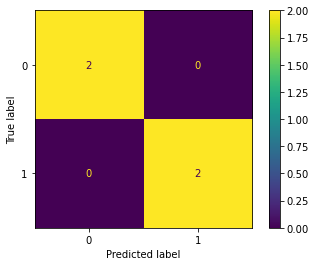

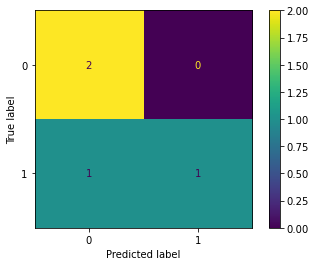

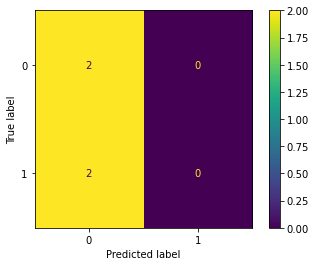

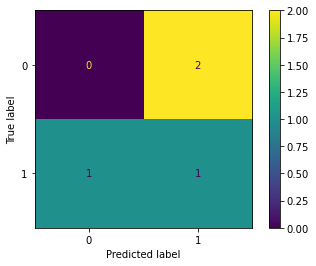

In [7]:
for clf in [y_smart, y_normal, y_dummy, y_stupid]:
    y_pred = np.array(clf) > 0.5
    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
    print(classification_report(y_true, y_pred))

# <font color='red'> 실습_01
    
### <font color='red'> 실습 _01_A.  
'encoded_data_TV_선호_scaled.xlsx' 파일을 불러와 훈련과 검증 8:2로 구분하여 혼동표와 분석보고서를 작성하라

In [8]:
import pandas as pd
df = pd.read_excel('../data/encoded_data_TV_선호_scaled.xlsx', index_col=0)   # 첫행은 건너띄고 파일 읽기
df.head() # 처음 5줄 확인하기

,성별_1,성별_2,지역_1,지역_2,지역_3,지역_4,지역_5,지역_6,지역_7,직업_1,...,드라마_genre_8,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_13,드라마_genre_14,드라마_genre_15,드라마_genre_16,구매
0,1,0,1,0,0,0,0,0,0,0,...,0.0,0.75,0.5,0.000000,0.0,0.25,0.00,0.0,0.0,1
1,1,0,1,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.333333,0.0,0.00,0.00,0.0,0.0,0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.000000,0.5,0.00,0.25,0.0,0.0,1
3,1,0,1,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0
4,1,0,1,0,0,0,0,0,0,0,...,0.0,0.00,0.5,0.250000,0.0,0.00,0.00,0.0,0.0,0


In [9]:
X = df.drop(['구매'], axis=1)  # '구매'변수를 제외하고 X로 features 객체화
y = df['구매'] # target을 y로 객체화

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11) # 80%, 20%로 훈련과 검증데이터 구분하기

In [11]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1357)               
knn = KNeighborsClassifier()            # 알고리즘 객체화
model = knn.fit(X_train, y_train) # 훈련데이터로 학습하기
y_predict = model.predict(X_test) # 검증데이터로 예측하기
y_probas = model.predict_proba(X_test) # 검증데이터로 예측확률 예측하기

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict)) # 분석보고서 확인하기

              precision    recall  f1-score   support

           0       0.71      0.82      0.77       522
           1       0.54      0.38      0.45       278

    accuracy                           0.67       800
   macro avg       0.62      0.60      0.61       800
weighted avg       0.65      0.67      0.65       800



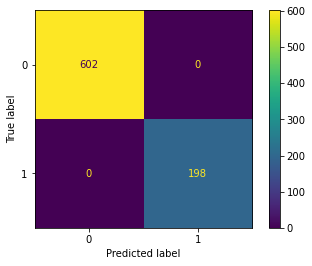

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_predict) # 혼동표 확인하기

### <font color='red'> 실습 _01_B.
'titanic' 파일을 불러와 훈련과 검증 8:2로 구분하여 혼동표와 분석보고서를 작성하라

In [14]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.columns
train = titanic[['survived', 'pclass', 'sex', 'sibsp',  'fare']]
train.head()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

,survived,pclass,sex,sibsp,fare
0,0,3,male,1,7.2500
1,1,1,female,1,71.2833
2,1,3,female,0,7.9250
3,1,1,female,1,53.1000
4,0,3,male,0,8.0500


<font color='red'> 5차 교차검증으로 모델 정확도의 평균과 표준편차를 구하라.

In [15]:
X = train.drop('survived', axis=1)  # 'survived'변수 제외하고 features 생성하기
y = train.survived # 종속변수 생성하여 객체화

성별(sex) 변수는 더미변수로 변환하여야 함

In [16]:
from sklearn.model_selection import train_test_split
X['sex_dummy'] = pd.get_dummies(X.sex)['female'] # 'sex'변수 더미로 만들기
X = X.drop('sex', axis=1) # 'sex' 변수를 features에서 제거하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11) # 훈련과 검증데이터 8:2로 구분하기

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
model = KNeighborsClassifier() # 알고리즘 소환
kf = KFold(n_splits=5, random_state=11) # 교차검증 회수 지정

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=kf)                  # 5 겹 교차검증의 모든 값
cross_val_score(model, X, y, cv=kf).mean()          # 5 겹 교차검증의 평균 확인하기
cross_val_score(model, X, y, cv=kf).std()           # 5 겹 교차검증의 표준편차 확인하기

array([0.72067039, 0.73595506, 0.80898876, 0.7247191 , 0.80898876])

0.7598644152909422

0.04042134430555131

In [19]:
model.fit(X_train, y_train) # Fit the model to data (학습하기)

KNeighborsClassifier()

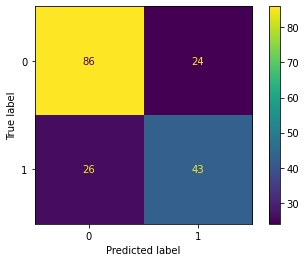

In [20]:
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(model, X_test, y_test)  # 검증데이터로 혼동표 만들기

In [21]:
y_predict = model.predict(X_test)            # 검증데이터로 예측하기
print(classification_report(y_test, y_predict)) # 실제와 예측에 대한 분석보고서 작성하기

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       110
           1       0.64      0.62      0.63        69

    accuracy                           0.72       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.72      0.72      0.72       179



# <font color='red'> 실습_02
### <font color='red'> 실습 _02_A.  

- '소비자행태자료' 파일을 불러와 훈련과 검증 8:2로 구분하여 그리드서치로 혼동표와 분석보고서를 작성하라
- 5겹 교차검증, 정확도기준, 훈련과 검증데이터의 target 비율은 동일하게
- 하이퍼파라미터 n_neighbors=[3, 11, 17, 25], weights=['uniform','distance'], leaf_size= [4 ,6, 8, 10]를 적용하여 분석보고서를 작성하라
- 최적모델의 파라미터를 나타내라

In [22]:
df = pd.read_excel('../data/encoded_data_TV_선호_scaled.xlsx', index_col=0)
X = df.drop(['구매'], axis=1)
y = df['구매']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11) # 훈련과 검증데이터 8:2로 구분하기

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
model = KNeighborsClassifier() # 알고리즘 소환
kf = KFold(n_splits=5, random_state=11) # 교차검증 회수 지정

In [26]:
hyperparameters = dict(n_neighbors=[11, 17, 25],
                      weights=['uniform','distance'],
                      leaf_size= [4 ,6])    # 최근접이웃, 거리비중, leaf내 자료 크기 하이퍼파라미터로 설정

In [27]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid = hyperparameters, cv=kf, verbose=1, scoring='accuracy') # knn으로 하이퍼파라미터 그리드서치 하기
grid.fit(X_train, y_train) # 그리드서치 최적 모델(5겹 교차검증의 평균 정확도가 가장 큰 하이퍼파라미터를 가진 모델)로 학습하기, 학습 완료후 전체 데이터를 refit

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [4, 6], 'n_neighbors': [11, 17, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [28]:
grid.best_estimator_     # 최적 모델 확인하기
grid.best_estimator_.get_params() # 최적 모델의 파라미터 확인하기

KNeighborsClassifier(leaf_size=4, n_neighbors=25)

{'algorithm': 'auto',
 'leaf_size': 4,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 25,
 'p': 2,
 'weights': 'uniform'}

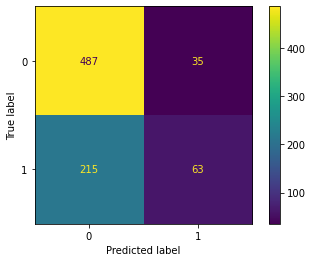

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid.best_estimator_, X_test, y_test)  # 검증데이터로 혼동표 만들기

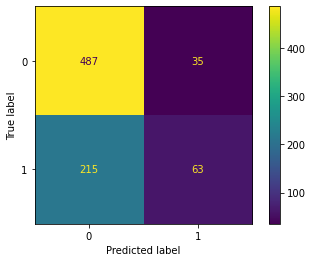

In [30]:
plot_confusion_matrix(grid.best_estimator_, X_test, y_test)  # 검증데이터로 혼동표 만들기

In [31]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.93      0.80       522
           1       0.64      0.23      0.34       278

    accuracy                           0.69       800
   macro avg       0.67      0.58      0.57       800
weighted avg       0.68      0.69      0.64       800



### <font color='red'> 실습 _02_B. 
- iris 데이터의 예측을 수행하라. 혼동표를 추가로 작성하라

In [32]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11) # 훈련과 검증데이터 8:2로 구분하기

In [34]:
hyperparameters = dict(n_neighbors=list(range(5,20, 2)),
                  weights=['uniform','distance'],
                  leaf_size= list(range(4, 10)),
                  algorithm= ['ball_tree', 'kd_tree'],
                  p= [1, 2])

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
model = KNeighborsClassifier() # 알고리즘 소환
kf = KFold(n_splits=5, random_state=11) # 교차검증 회수 지정

In [36]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(model, hyperparameters, cv=kf, verbose=True) # knn으로 하이퍼파라미터 무작위서치 하기
grid.fit(X_train, y_train) # 무작위서치 최적 모델(5겹 교차검증의 평균 정확도가 가장 큰 하이퍼파라미터를 가진 모델)로 학습하기, 학습 완료후 전체 데이터를 refit

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [4, 5, 6, 7, 8, 9],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [37]:
grid.best_estimator_     # 최적 모델 확인하기
grid.best_estimator_.get_params() # 최적 모델의 파라미터 확인하기

KNeighborsClassifier(algorithm='kd_tree', leaf_size=6, n_neighbors=19,
                     weights='distance')

{'algorithm': 'kd_tree',
 'leaf_size': 6,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'distance'}

In [38]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



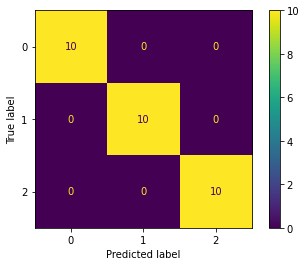

In [39]:
plot_confusion_matrix(grid, X_test, y_test)

무작위 서치를 늘리고 싶을 경우 n_iter=50

In [40]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(model, hyperparameters, cv=kf, n_iter=50, verbose=True) # knn으로 하이퍼파라미터 무작위서치 하기
grid.fit(X_train, y_train) # 무작위서치 최적 모델(5겹 교차검증의 평균 정확도가 가장 큰 하이퍼파라미터를 가진 모델)로 학습하기, 학습 완료후 전체 데이터를 refit

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [4, 5, 6, 7, 8, 9],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [41]:
grid.best_estimator_     # 최적 모델 확인하기
grid.best_estimator_.get_params() # 최적 모델의 파라미터 확인하기

KNeighborsClassifier(algorithm='kd_tree', leaf_size=6, n_neighbors=13,
                     weights='distance')

{'algorithm': 'kd_tree',
 'leaf_size': 6,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'distance'}

In [42]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# <font color='red'> 실습_03 Pipeline

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

categorical_features = ['embarked', 'sex', 'pclass']
numeric_features = ['age', 'fare']

In [45]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [46]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
pd.DataFrame(clf.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10
0,-2.055675,-0.337470,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.049092,-0.488188,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.028084,0.433107,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.126268,-0.488579,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.666502,-0.489676,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1042,-0.898031,0.859830,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1043,-0.126268,-0.438888,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1044,0.954200,-0.494292,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1045,-2.255045,-0.476137,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncod

model score: 0.752


# <font color='red'> Intermission
###  오렌지색(X, y의 평균)을 분류 예측하고 구분선을 시각화한다

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

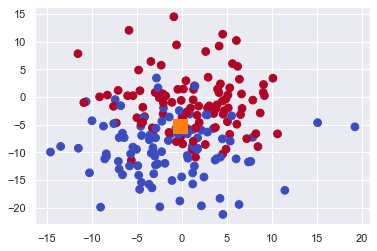

In [50]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='coolwarm')
plt.scatter(X[:, 0].mean(), X[:, 1].mean(), color = '#ff7f0e', s=200, marker='s')

In [51]:
Xmean = np.array([X[:, 0].mean(), X[:, 1].mean()])        # 가로세록축의 평균을 구한다
Xmean.shape
Xnew = Xmean[np.newaxis, :]     # 차원을 확대
Xnew.shape

(2,)

(1, 2)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

MLA = [KNeighborsClassifier(), GaussianNB(),  LogisticRegression(), 
       DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier()]

In [53]:
# ! pip install mlxtend
from mlxtend.plotting import plot_decision_regions

def plot_model(X, y, clf) :
    clf.fit(X, y)        # 예측하기
    accuracy = cross_val_score(clf, X, y, scoring = 'accuracy').mean()*100      # 5겹 교차검증하여 평균 정확도 구하기
    y_predict = clf.fit(X, y).predict(Xnew)                               # 예측 구하기
    y_proba_buy = clf.fit(X, y).predict_proba(Xnew)[:,1]           # 구매 확률 구하기
    print(f'모델 {clf}의 정확도 {accuracy}, 예측분류값{y_predict}, 예측확률{y_proba_buy}')
    print('*'*100)
    plt.figure(figsize=(12,5))
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(clf)

모델 KNeighborsClassifier()의 정확도 76.0, 예측분류값[1], 예측확률[0.6]
****************************************************************************************************
모델 GaussianNB()의 정확도 76.99999999999999, 예측분류값[1], 예측확률[0.53065434]
****************************************************************************************************
모델 LogisticRegression()의 정확도 80.0, 예측분류값[0], 예측확률[0.49951034]
****************************************************************************************************
모델 DecisionTreeClassifier()의 정확도 73.50000000000001, 예측분류값[1], 예측확률[1.]
****************************************************************************************************
모델 RandomForestClassifier()의 정확도 76.5, 예측분류값[1], 예측확률[0.67]
****************************************************************************************************
모델 AdaBoostClassifier()의 정확도 72.00000000000001, 예측분류값[1], 예측확률[0.50831257]
****************************************************************************************************


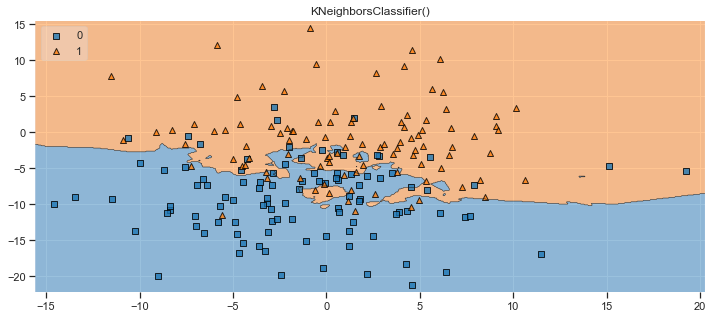

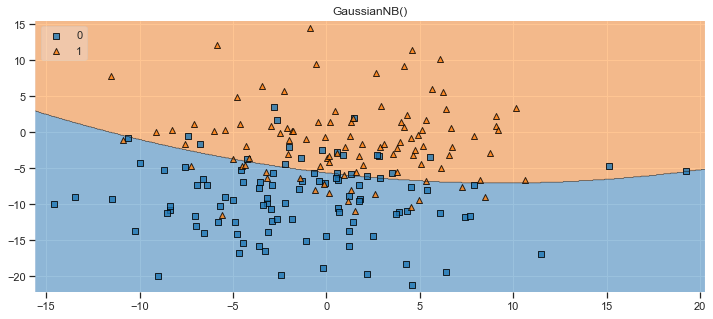

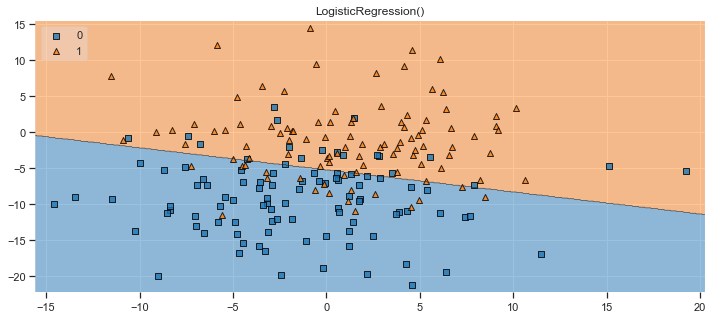

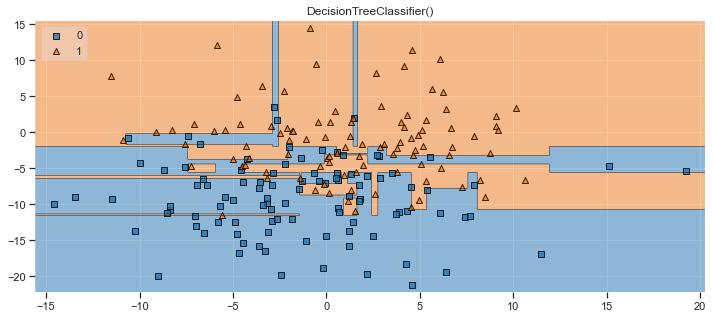

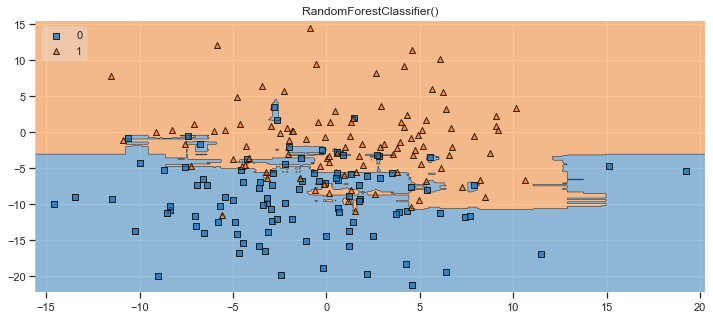

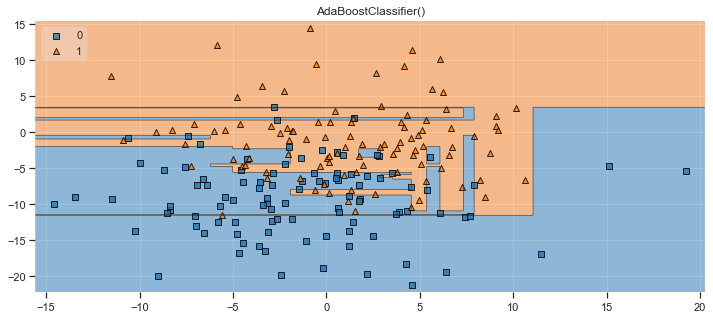

In [54]:
for clf in MLA :
    plot_model(X, y, clf)

# <font color='red'> 실습_04 예측 알고리즘 적용
    
- 'encoded_data_TV_선호_모두_1'을 불러와 MLA를 적용하여 각 모델의 분석보고서를 각각 확인한다.

In [55]:
df = pd.read_excel('../data/encoded_data_TV_선호_모두_1.xlsx', index_col=0)
df.head()
X = df.drop(['구매'], axis=1)
y = df['구매']

,성별_1,성별_2,지역_1,지역_2,지역_3,지역_4,지역_5,지역_6,지역_7,직업_1,...,드라마_genre_8,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_13,드라마_genre_14,드라마_genre_15,드라마_genre_16,구매
0,1,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11) # 훈련과 검증데이터 8:2로 구분하기

In [57]:
from sklearn.metrics import confusion_matrix, roc_auc_score 
from sklearn.metrics import average_precision_score, log_loss

In [58]:
results = {}

for model in MLA:
    print('모델은', type(model))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    y_score = y_proba[:, 1]
    print(classification_report(y_test, y_pred))
    confusion_matrix(y_test, y_pred)
    result = {
        'AUROC' : roc_auc_score(y_test, y_score),
        'Average PR' : average_precision_score(y_test, y_score),
        'Log_loss' : log_loss(y_test, y_proba)
    }
    print('*'*50)
    
    results.update({type(model): result})

모델은 <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       522
           1       0.59      0.39      0.47       278

    accuracy                           0.69       800
   macro avg       0.66      0.62      0.63       800
weighted avg       0.68      0.69      0.67       800



array([[447,  75],
       [170, 108]], dtype=int64)

**************************************************
모델은 <class 'sklearn.naive_bayes.GaussianNB'>


GaussianNB()

              precision    recall  f1-score   support

           0       0.77      0.03      0.06       522
           1       0.35      0.98      0.52       278

    accuracy                           0.36       800
   macro avg       0.56      0.51      0.29       800
weighted avg       0.63      0.36      0.22       800



array([[ 17, 505],
       [  5, 273]], dtype=int64)

**************************************************
모델은 <class 'sklearn.linear_model._logistic.LogisticRegression'>


LogisticRegression()

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       522
           1       0.52      0.29      0.38       278

    accuracy                           0.66       800
   macro avg       0.61      0.58      0.57       800
weighted avg       0.64      0.66      0.63       800



array([[447,  75],
       [196,  82]], dtype=int64)

**************************************************
모델은 <class 'sklearn.tree._classes.DecisionTreeClassifier'>


DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       522
           1       0.45      0.49      0.47       278

    accuracy                           0.61       800
   macro avg       0.58      0.58      0.58       800
weighted avg       0.62      0.61      0.62       800



array([[355, 167],
       [143, 135]], dtype=int64)

**************************************************
모델은 <class 'sklearn.ensemble._forest.RandomForestClassifier'>


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.73      0.93      0.81       522
           1       0.71      0.34      0.46       278

    accuracy                           0.72       800
   macro avg       0.72      0.63      0.64       800
weighted avg       0.72      0.72      0.69       800



array([[484,  38],
       [183,  95]], dtype=int64)

**************************************************
모델은 <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       522
           1       0.52      0.32      0.39       278

    accuracy                           0.66       800
   macro avg       0.61      0.58      0.58       800
weighted avg       0.64      0.66      0.64       800



array([[442,  80],
       [190,  88]], dtype=int64)

**************************************************


In [59]:
pd.DataFrame.from_dict(results).T

,AUROC,Average PR,Log_loss
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>,0.670967,0.511787,1.926114
<class 'sklearn.naive_bayes.GaussianNB'>,0.634989,0.456309,8.416790
<class 'sklearn.linear_model._logistic.LogisticRegression'>,0.645084,0.491857,0.623594
<class 'sklearn.tree._classes.DecisionTreeClassifier'>,0.582844,0.395828,13.383776
<class 'sklearn.ensemble._forest.RandomForestClassifier'>,0.715810,0.606812,0.577032
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>,0.642407,0.506343,0.689649


# <font color='red'> 실습_05_   당뇨 자료를 읽어 예측하기

In [60]:
from sklearn.datasets import load_diabetes
X = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
y = load_diabetes().target

In [61]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, precision_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, recall_score, log_loss, brier_score_loss

In [62]:
classifiers = {}
classifiers.update({'LGR': LogisticRegression(random_state=11, solver ='liblinear')})
classifiers.update({'SVC': SVC(random_state=11, max_iter=300, probability=True)})
classifiers.update({'Random Forest': RandomForestClassifier()})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier()})

In [63]:
DECISION_FUNCTIONS = {'SVC'}

In [64]:
parameters = {}
parameters.update({'LGR': 
{ 
'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l1', 'l2']}
})

In [65]:
parameters.update({'SVC': 
{ 
'classifier__kernel': ['linear', 'rbf', 'poly'],
'classifier__gamma': ['auto'],
'classifier__C': [0.1, 0.5, 1, 5, 10, 50, 100],
'classifier__degree': [1, 2, 3, 4, 5, 6]
}})

In [66]:
parameters.update({'Random Forest': 
{ 
'classifier__n_estimators': [200],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__criterion' :['gini', 'entropy']     ,
'classifier__n_jobs': [-1]
}})

In [67]:
parameters.update({'Gradient Boosting': 
{ 
'classifier__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
'classifier__n_estimators': [200],
'classifier__max_depth': [2,3,4,5,6],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__subsample': [0.8, 0.9, 1]
}})

In [68]:
#! pip install tqdm
from tqdm import tqdm_notebook
kf = KFold(n_splits=3)

In [69]:
results = {}
for classifier_label, classifier in tqdm_notebook(classifiers.items()):
    steps = [('scaler', StandardScaler()), ('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = parameters[classifier_label]
    
    gs = RandomizedSearchCV(pipeline, param_grid, cv = 2,  n_iter = 2,
                            scoring = 'recall_macro')    


    y_pred = gs.fit(X_train, y_train).predict(X_test)
    
    if classifier_label in DECISION_FUNCTIONS:
        y_proba = gs.decision_function(X_test)
        ap = average_precision_score(y_test, y_proba)
    else:
        y_proba = gs.predict_proba(X_test)[:,1]
        ap = average_precision_score(y_test, y_proba)

   
    result = {'Best Parameters': gs.best_params_,
              'Training recall_macro': gs.best_score_,
              'AUROC': roc_auc_score(y_test, y_proba),
              'Average PR': ap,
              'F1-score': f1_score(y_test, y_pred),
              'CV accuracy': cross_val_score(gs, X_train, y_train).mean(),
              'Log_loss': log_loss(y_test, y_proba),
             }
    
    results.update({classifier_label: result})

In [70]:
pd.DataFrame(results).T.sort_values(by = 'F1-score', ascending=False)

,Best Parameters,Training recall_macro,AUROC,Average PR,F1-score,CV accuracy,Log_loss
Random Forest,"{'classifier__n_jobs': -1, 'classifier__n_esti...",0.61293,0.640708,0.483758,0.518828,0.622691,0.672242
Gradient Boosting,"{'classifier__subsample': 0.8, 'classifier__n_...",0.578289,0.648095,0.507992,0.373786,0.570737,0.616569
LGR,"{'classifier__penalty': 'l1', 'classifier__C':...",0.581357,0.64895,0.49526,0.370023,0.589109,0.619429
SVC,"{'classifier__kernel': 'rbf', 'classifier__gam...",0.561183,0.502357,0.353739,0.270707,0.526909,9.43617


# <font color='red'> 실습_06_   모델 해석(Model Interpretability)

In [71]:
df = pd.read_excel('../data/encoded_data_TV_선호_scaled.xlsx', index_col=0)
df = df.sample(frac=0.1)
X = df.drop(['구매'], axis=1)
y = df['구매']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11) # 훈련과 검증데이터 8:2로 구분하기

In [73]:
model = RandomForestClassifier().fit(X_train, y_train)

## □ 특성변수 model-based 중요도

랜덤포레스트 모델의 입력변수의 중요도를 X축으로 하여 변수명을 그림으로 나타내었다

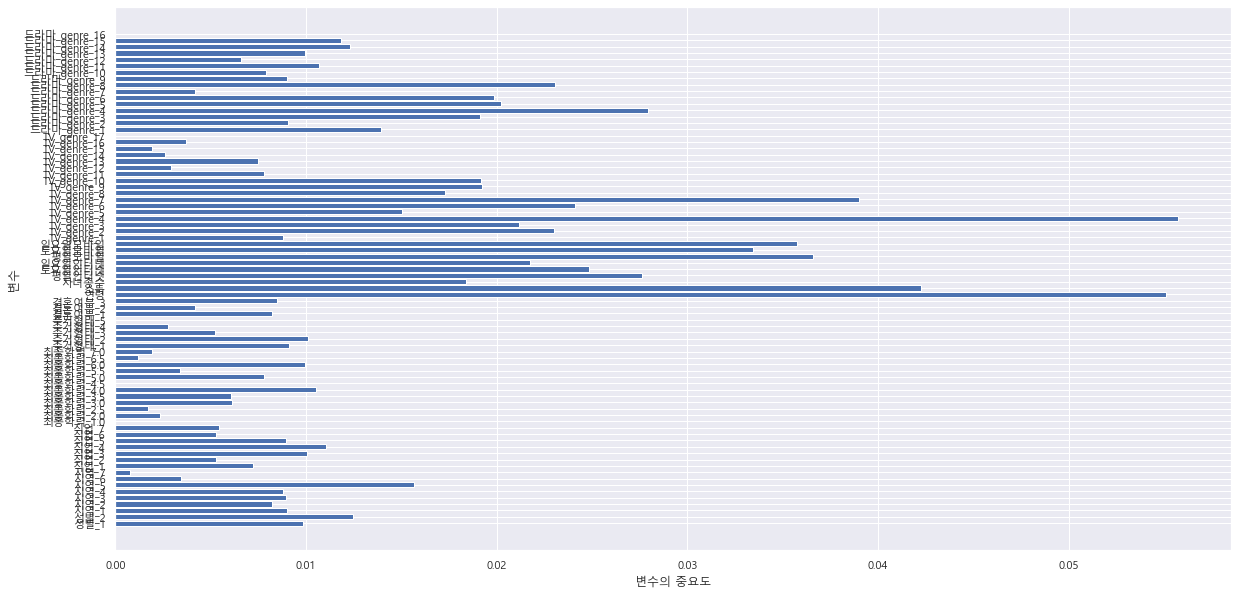

In [74]:
sns.set()
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
def plot_feature_importances(model):
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.barh(range(X_train.shape[1]), model.feature_importances_, align='center')
    plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
    plt.xlabel('변수의 중요도')
    plt.ylabel('변수')
plot_feature_importances(model)

## □ 특성변수 permutation-based 중요도

특정 변수의 값을 무작위로 재정렬하여(permutation) 학습하는 경우 모델의 정확도에 영향을 얼마나 주는지를 가리키는 지표로 앞의 ‘model_based’ 중요도의 크기와는 다르다. 

array([0.    , 0.0016, 0.    , 0.    , 0.    , 0.0028, 0.01  , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0028,
       0.    , 0.    , 0.    , 0.0031, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0031,
       0.    , 0.    , 0.    , 0.    , 0.005 , 0.0088, 0.    , 0.    ,
       0.0016, 0.0006, 0.0044, 0.    , 0.0016, 0.    , 0.    , 0.    ,
       0.0309, 0.0031, 0.    , 0.0078, 0.0028, 0.0053, 0.0016, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0028, 0.    , 0.0031, 0.0022, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

array([ 0, 34, 35, 76, 39, 43, 45, 46, 47, 50, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 75, 33, 32, 38, 77, 16, 17,
       18, 30, 12, 11, 10,  9,  8,  7, 20, 21, 13, 22, 23,  3, 24, 25,  2,
       26, 27, 28, 29,  4, 14, 41, 40,  1, 54, 44, 67, 52, 64, 15,  5, 31,
       19, 66, 49, 42, 36, 53, 51, 37,  6, 48], dtype=int64)

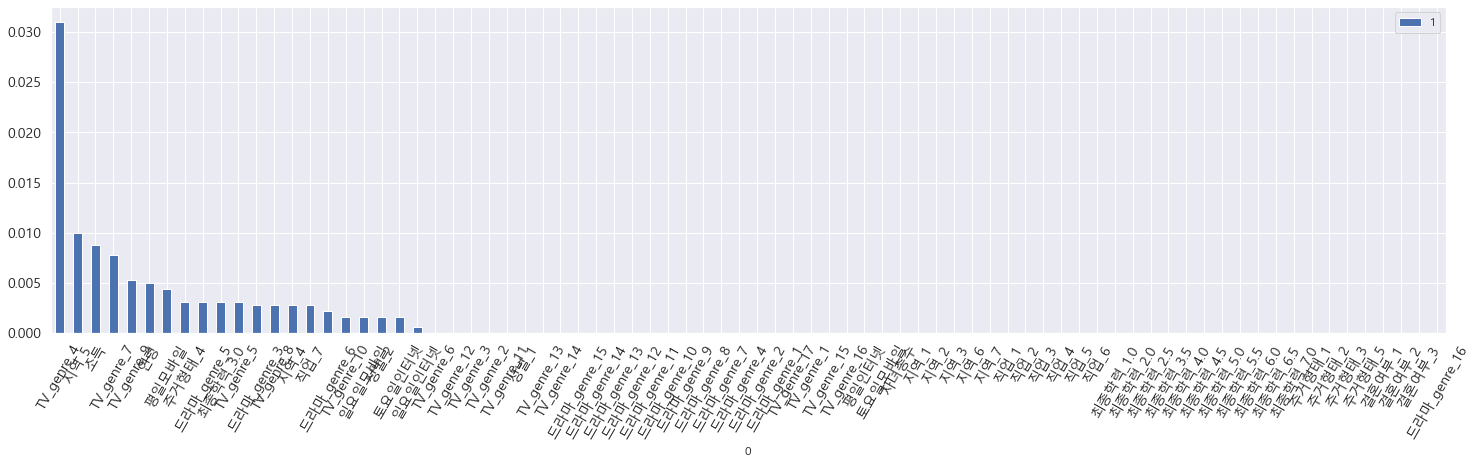

In [75]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=0)
result.importances_mean.round(4)
np.argsort(result.importances_mean)
data = pd.DataFrame(list(zip(X_train.columns, result.importances_mean)))
data.sort_values(by =1, ascending= False, inplace =True)
data.plot(kind='bar', x=0, y=1, rot='60', figsize=(25, 6), fontsize=14)

## □ 특성변수 SHAP value

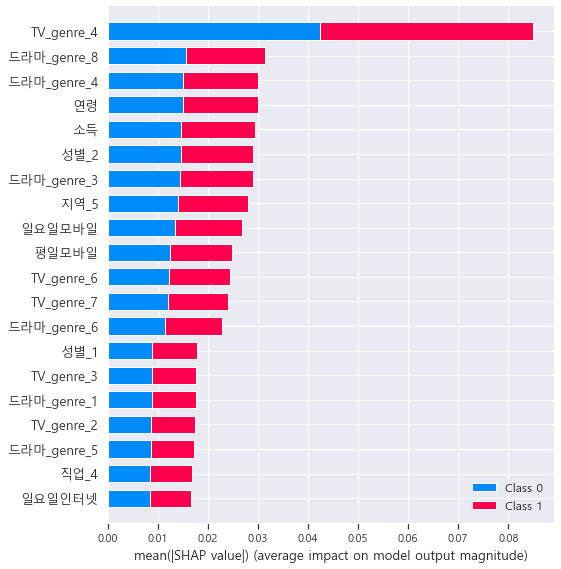

In [76]:
#! pip install shap
import shap
explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

# <font color='red'> 실습_07_ low code (pycaret)
https://pycaret.org/

In [77]:
#! pip install pycaret
from pycaret.utils import version
version()

'2.1.2'

In [78]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')
diabetes.shape

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)

In [79]:
from pycaret.classification import *

In [80]:
df = setup(data = diabetes, target='Class variable', silent=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,8803
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [81]:
df[0]

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_15,Number of times pregnant_17,Number of times pregnant_2,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9
0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349,47.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.7655,0.8122,0.5412,0.7149,0.6123,0.4507,0.4613,0.0072
1,Logistic Regression,0.7637,0.7972,0.5573,0.7049,0.6188,0.4522,0.4607,0.0309
2,Ridge Classifier,0.7618,0.0000,0.5360,0.7077,0.6065,0.4422,0.4524,0.0056
3,CatBoost Classifier,0.7507,0.8115,0.5734,0.6721,0.6130,0.4321,0.4391,1.6373
4,Ada Boost Classifier,0.7488,0.8050,0.5944,0.6556,0.6190,0.4336,0.4375,0.0927
5,Gradient Boosting Classifier,0.7340,0.7987,0.5316,0.6425,0.5753,0.3869,0.3939,0.1188
6,Light Gradient Boosting Machine,0.7264,0.7759,0.5567,0.6278,0.5855,0.3837,0.3880,0.0655
7,Decision Tree Classifier,0.7114,0.6889,0.6149,0.5843,0.5948,0.3723,0.3755,0.0040
8,Extra Trees Classifier,0.7097,0.7700,0.5146,0.6138,0.5465,0.3386,0.3497,0.1270
9,K Neighbors Classifier,0.7058,0.7359,0.5085,0.5964,0.5423,0.3296,0.3357,0.0048


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [83]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [84]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.9023,0.5263,0.9091,0.6667,0.5507,0.5902
1,0.8333,0.8737,0.6842,0.8125,0.7429,0.6209,0.6259
2,0.7593,0.7789,0.6316,0.6667,0.6486,0.4658,0.4661
3,0.7963,0.8632,0.6316,0.7500,0.6857,0.5367,0.5410
4,0.7407,0.7684,0.5263,0.6667,0.5882,0.4028,0.4088
5,0.6667,0.6827,0.3158,0.5455,0.4000,0.1913,0.2050
6,0.6296,0.6331,0.3684,0.4667,0.4118,0.1469,0.1491
7,0.7358,0.7587,0.5556,0.6250,0.5882,0.3948,0.3963
8,0.8491,0.8730,0.6667,0.8571,0.7500,0.6443,0.6547
9,0.8113,0.8381,0.6667,0.7500,0.7059,0.5677,0.5698


In [85]:
tunes_lr = tune_model(lr, fold=3)
tunes_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7877,0.8376,0.5806,0.7500,0.6545,0.5049,0.5135
1,0.7318,0.7519,0.4677,0.6591,0.5472,0.3644,0.3752
2,0.7486,0.8072,0.5397,0.6800,0.6018,0.4216,0.4276
Mean,0.7561,0.7989,0.5294,0.6964,0.6012,0.4303,0.4388
SD,0.0234,0.0355,0.0467,0.0389,0.0438,0.0577,0.0570


LogisticRegression(C=6.673, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8803, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
evaluate_model(tunes_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [87]:
pred_holdout = predict_model(tunes_lr)
pred_holdout.shape
pred_holdout.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8165,0.5802,0.6812,0.6267,0.4489,0.452


(231, 27)

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,174.0,88.0,37.0,120.0,44.5,0.646,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6176
1,102.0,76.0,37.0,0.0,32.9,0.665,46.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.6349
2,91.0,54.0,25.0,100.0,25.2,0.234,23.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0722
3,102.0,75.0,23.0,0.0,0.0,0.572,21.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0109
4,163.0,72.0,41.0,114.0,40.9,0.817,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8885
